# Week 4 - Clean the gathered dataset

We first need to import the python libraries we need.

##### 1 - Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Now we can import the ‘investments_vc.csv’ dataset, which is in the same folder as this file.

#### 2 - File

In [3]:
df = pd.read_csv('investments_vc.csv')

Now we can run through some simple checks to ensure that the dataset is the one we wanted and is loaded correctly.

#### 3 - Shape (Rows, Cols)

In [4]:
# Checking the size of the dataset
df.shape

(49438, 39)

#### 4 - Columns

In [5]:
# Checking the columns of the dataset
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

#### 5 - Data Types

In [6]:
# Checking the types
df.dtypes

permalink                object
name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds            int64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
last_funding_at          object
seed                      int64
venture                   int64
equity_crowdfunding       int64
undisclosed               int64
convertible_note          int64
debt_financing            int64
angel                     int64
grant                     int64
private_equity            int64
post_ipo_equity           int64
post_ipo_debt             int64
secondary_market          int64
product_crowdfunding      int64
round_A 

#### 6 - Select Numeric Columns

In [7]:
# Returns numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['funding_rounds' 'founded_year' 'seed' 'venture' 'equity_crowdfunding'
 'undisclosed' 'convertible_note' 'debt_financing' 'angel' 'grant'
 'private_equity' 'post_ipo_equity' 'post_ipo_debt' 'secondary_market'
 'product_crowdfunding' 'round_A' 'round_B' 'round_C' 'round_D' 'round_E'
 'round_F' 'round_G' 'round_H']


#### 7 - Select Non-Numeric Columns

In [8]:
# Returns non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['permalink' 'name' 'homepage_url' 'category_list' 'market'
 'funding_total_usd' 'status' 'country_code' 'state_code' 'region' 'city'
 'founded_at' 'founded_month' 'founded_quarter' 'first_funding_at'
 'last_funding_at']


See that ‘funding_total_usd’ should be under the numeric branch. We can see it’s being returned as a String. Issue is we have commas in place so we must now remove them.

#### 8 - Clean Data

In [9]:
# Removing the unwanted column at the start of the dataset (permalink)
print('Shape before removing: {}'.format(df.shape))
df.drop(labels=['permalink'], axis='columns', inplace=True)
print('Shape after removing: {}'.format(df.shape))


# Cleaning funding_total_usd column
df['funding_total_usd'] = df['funding_total_usd'].str.strip() # Removes whitespace

df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '') # Removes commas

df = df[df['funding_total_usd'] != '-'] # Ignore rows with ‘-’

df['funding_total_usd'] = df['funding_total_usd'].astype(int) # Converts object to int

df = df[df['funding_total_usd'] > 25000] # Ignores rows with values less than 25k


# Cleaning founded_year column
df['founded_year'] = df['founded_year'].fillna(-1)  # Fills missing data with -1

df['founded_year'] = df['founded_year'].astype(int) # Converts float to int

df = df[df['founded_year'] > 1900] # Ignores rows with values less than 1900

Shape before removing: (49438, 39)
Shape after removing: (49438, 38)


Now that this cleaning has been completed, we can check if there is still a lot of missing data in the dataset.

#### 9 - Missing Data Check

<AxesSubplot:>

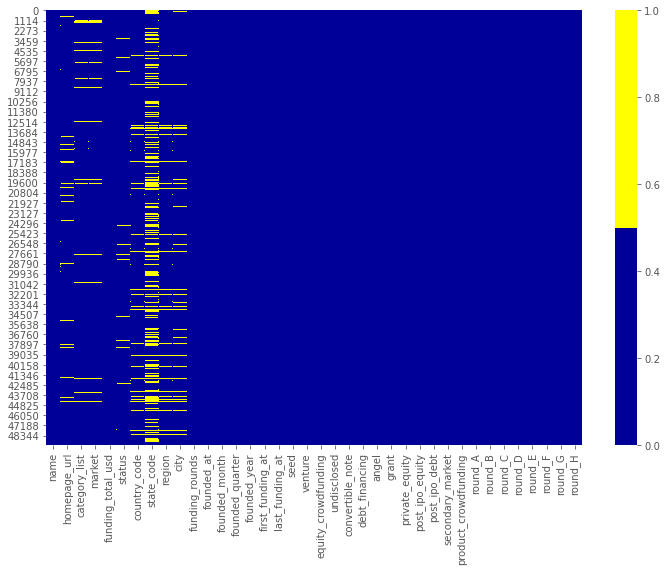

In [10]:
# Heat map of missing data
cols = df.columns[:39]
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

The data is quite good, with little to no information missing after some cleaning.

#### 10 - Info

In [11]:
# Printing a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629 entries, 0 to 49437
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  30629 non-null  object
 1   homepage_url          29427 non-null  object
 2   category_list         29606 non-null  object
 3   market                29602 non-null  object
 4   funding_total_usd     30629 non-null  int64 
 5   status                29904 non-null  object
 6   country_code          28604 non-null  object
 7   state_code            20090 non-null  object
 8   region                28604 non-null  object
 9   city                  28260 non-null  object
 10  funding_rounds        30629 non-null  int64 
 11  founded_at            30629 non-null  object
 12  founded_month         30629 non-null  object
 13  founded_quarter       30629 non-null  object
 14  founded_year          30629 non-null  int64 
 15  first_funding_at      30629 non-null

#### 11 - Head

In [12]:
# Viewing the first 5 rows of the datatable
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,New York,...,0,0,0,0,0,0,0,0,0,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,Tallinn,...,0,0,0,0,0,0,0,0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,London,...,0,0,0,0,0,0,0,0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,Fort Worth,...,0,0,0,0,0,0,0,0,0,0
5,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,Oakland Park,...,0,0,0,7000000,0,0,0,0,0,0


#### 12 - Tail

In [13]:
# Viewing the last 5 rows of the datatable
df.tail()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
49430,Zyraz Technology,http://www.zyraz.com,|Biotechnology|,Biotechnology,15419877,closed,MYS,NaN,MYS - Other,Damansara New Village,...,0,0,7991547,0,0,0,0,0,0,0
49432,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,Vienna,Gerasdorf Bei Wien,...,0,0,2686600,0,0,0,0,0,0,0
49433,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,London,...,0,0,0,0,0,0,0,0,0,0
49435,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97398,operating,HRV,NaN,Split,Split,...,0,0,0,0,0,0,0,0,0,0
49437,[x+1],http://www.xplusone.com/,|Enterprise Software|,Enterprise Software,45000000,operating,USA,NY,New York City,New York,...,0,0,16000000,10000000,0,0,0,0,0,0


Now that we’ve cleaned the dataset and checked that we’re happy with it, we can export the cleaned version as a csv file for future use.

#### 13 - Export to CSV

In [14]:
df.to_csv("startup_investments_cleaned.csv")

#### 14 - Descriptive Statistics

In [15]:
# Generates descriptive statistics and transposes it using .T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_total_usd,30629.0,1.743873e+07,1.895396e+08,25025.0,500000.0,2250000.0,10570000.0,3.007950e+10
funding_rounds,30629.0,1.974012e+00,1.481056e+00,1.0,1.0,1.0,2.0,1.800000e+01
founded_year,30629.0,2.007044e+03,7.644210e+00,1902.0,2005.0,2009.0,2011.0,2.014000e+03
seed,30629.0,3.069896e+05,1.052567e+06,0.0,0.0,0.0,150000.0,1.000000e+08
venture,30629.0,1.025238e+07,3.454863e+07,0.0,0.0,845000.0,8100000.0,2.351000e+09
equity_crowdfunding,30629.0,8.705305e+03,2.433898e+05,0.0,0.0,0.0,0.0,2.500000e+07
undisclosed,30629.0,1.248225e+05,2.586739e+06,0.0,0.0,0.0,0.0,2.508000e+08
convertible_note,30629.0,3.041858e+04,1.757786e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,30629.0,2.474990e+06,1.739621e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,30629.0,9.112640e+04,6.766078e+05,0.0,0.0,0.0,0.0,4.392386e+07


These are the descriptive statistics. Our metric of value is 'funding_total_usd'. We can use visualisations like a histogram, box plot and violin plot to get a better understanding of these figures with reference to our metric of value.

#### 15 - Sort Funding Total USD Data (Low to High)

In [16]:
# Sorts funding_total_usd column from low to high
df['funding_total_usd'].sort_values(ascending=True)

43729          25025
6264           25025
24484          25200
38054          25912
16954          25996
            ...     
38289     2600000000
15315     3500000000
7977      5162513431
8664      5700000000
45815    30079503000
Name: funding_total_usd, Length: 30629, dtype: int64

#### 16 - Funding Total USD Histogram

/Users/finnian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


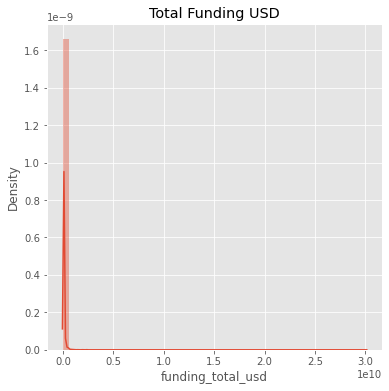

In [17]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['funding_total_usd']) 
p = plt.title('Total Funding USD')

This graph isn’t very helpful so we should cut the data into subsets of the dataset in an attempt to get a clearer picture of the distribution of the data in the funding_total_usd column.

#### 17 - Groups for Total Funding Histogram

In [18]:
# Lists for data to be grouped
first_band = []
second_band = []
third_band = []
fourth_band = []
fifth_band = []
sixth_band = []
seventh_band = []
eighth_band = []
ninth_band = []
tenth_band = []

# Function for grouping
def total_funding_groups(row):
    if row['funding_total_usd'] >= 0 and row['funding_total_usd'] <= 5000000:
        first_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 5000000 and row['funding_total_usd'] <= 10000000:
        second_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 10000000 and row['funding_total_usd'] <= 15000000:
        third_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 15000000 and row['funding_total_usd'] <= 20000000:
        fourth_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 20000000 and row['funding_total_usd'] <= 25000000:
        fifth_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 25000000 and row['funding_total_usd'] <= 30000000:
        sixth_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 30000000 and row['funding_total_usd'] <= 35000000:
        seventh_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 35000000 and row['funding_total_usd'] <= 40000000:
        eighth_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 40000000 and row['funding_total_usd'] <= 45000000:
        ninth_band.append(row['funding_total_usd'])
    elif row['funding_total_usd'] > 45000000:
        tenth_band.append(row['funding_total_usd'])
    else:
        row['funding_total_usd'] = ''
    return row['funding_total_usd']

df['funding_group'] =  df.apply(total_funding_groups,axis =1)

The data has been split into 10 different groups. The range of these groups are 5 million, with the final group being the exception to this - 45 million+. New bands can also be created using the above code.

#### 18 - First Band Histogram

/Users/finnian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


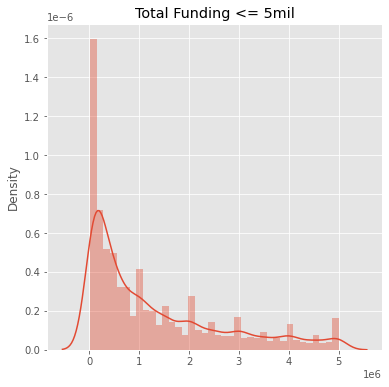

In [19]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=first_band) 
p = plt.title('Total Funding <= 5mil')

Here we can see the histogram of the first band (0 - 5 million). This is positively skewed (with outliers), indicating the data is not normally distributed.

#### 19 - Second Band Histogram

/Users/finnian/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


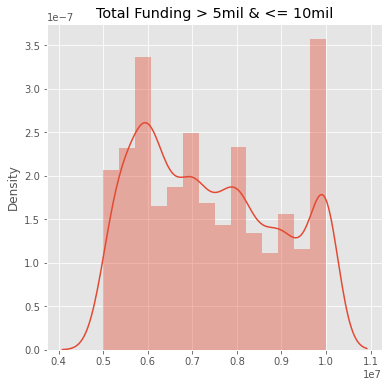

In [20]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=second_band) 
p = plt.title('Total Funding > 5mil & <= 10mil')

Here we can see the histogram of the second band (5 - 10 million). This is a multimodal distribution, indicating it is not normal.

This process can be repeated with the other bands.

#### 20 - Box Plot (First Band)

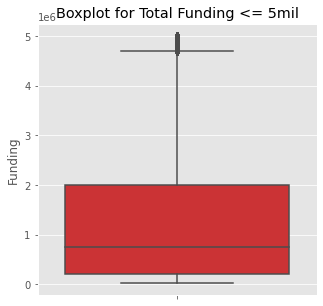

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(y=first_band, data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Total Funding <= 5mil')
p = plt.ylabel('Funding')

The position of the box, its whiskers and the position of the line in the box also tells us that the sample is skewed to the right. There is further evidence of outliers with data beyond the whiskers.

#### 21 - Violin Plot (First Band)

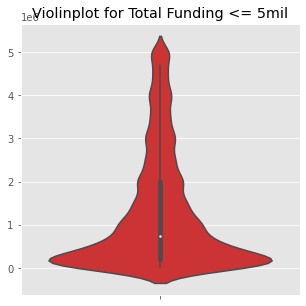

In [22]:
plt.figure(figsize=(5,5))
sns.violinplot(y=first_band, data=df, orient='v', palette='Set1')
p = plt.title('Violinplot for Total Funding <= 5mil')

The Violin Plot is essentially a combination of a histogram and box plot. We can see the full distribution of the data, including the probability density of the data at different values. There is more evidence of outliers present here beyond the line.

# Week 5 - Perform analysis using visualisations

Now we can use the seaborn library to produce a scatter plot matrix.

#### 1 - Scatter Plot Matrix

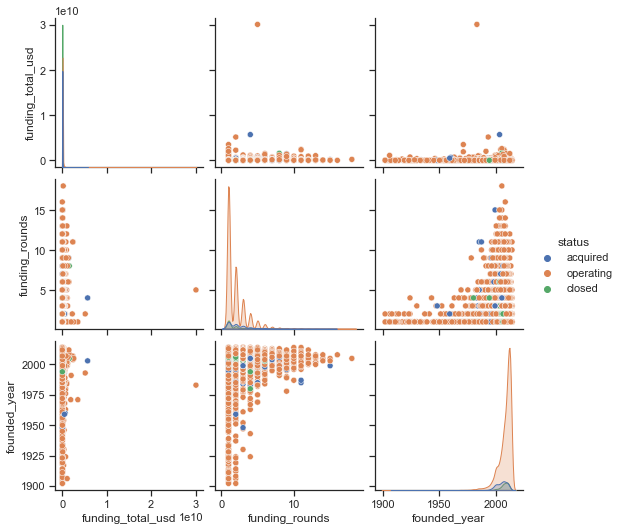

In [23]:
sns.set(style='ticks')
sns.pairplot(df, hue='status', vars=['funding_total_usd', 'funding_rounds', 'founded_year'])

The scatter plot matrix didn’t reveal any clear relationships (nor did other combinations of variables) but in order to demonstrate the ability to create a scatter plot, we’ll focus on the funding_total_usd and founded_year relationship.

#### 2 - Fitted Trend Line (Funding Total & Year Founded)

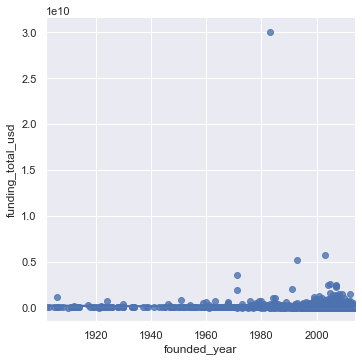

In [24]:
sns.set(color_codes=True)
g = sns.lmplot(x="founded_year", y="funding_total_usd", data=df)

By examining this relationship with the hue of status, we may be able to deduct more value from this graph. For frame of reference, here is a quick overview of companies’ statuses as of 2015.

#### 3 - Status of Companies

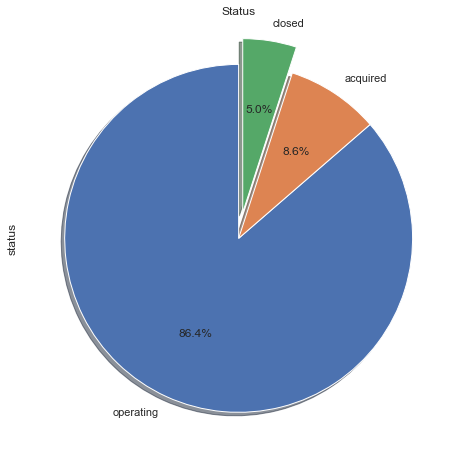

In [25]:
plt.figure(figsize = (8,8))
df.status.value_counts().plot(kind='pie',shadow=True, explode=(0, 0, 0.15), startangle=90,autopct='%1.1f%%')
plt.title('Status')
plt.show()

The majority of companies are still operating, with only 8.6% having been acquired. Of the companies in this dataset, 5% have closed. It could be worth exploring the factors behind those companies that were acquired, and those that have had to fold. This space may lead to valuable insights into what factors determine success and failure in startups, and can be leveraged by those working in venture capital.

#### 4 - Fitted Trend Line (Funding Total & Year Founded + Status)

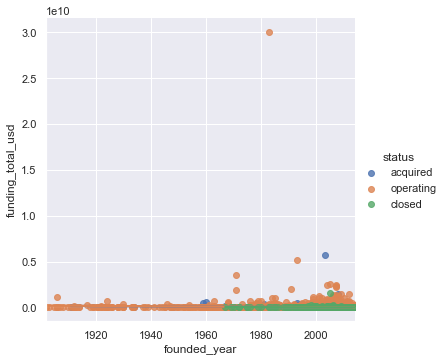

In [26]:
sns.set(color_codes=True)
g = sns.lmplot(x="founded_year", y="funding_total_usd", data=df, hue="status")

Interesting that companies pre 1960s are still operating but there seems to be a lot more closures (failures) in recent years. This would account for the dot.com bubble and possibly even more competitive markets (based on time) etc. We can group these companies by year founded to better understand the development of new startups over time.

#### 5 - Grouped By Founding Year Brackets

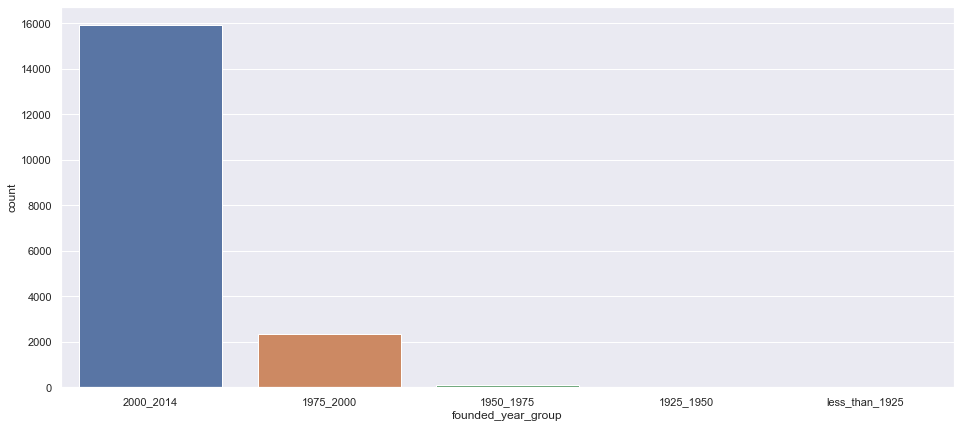

In [27]:
# Groups data by year range
def year_group(row):
    if row['founded_year'] >= 1900 and row['founded_year'] <= 1925:
        row['founded_year_group'] = 'less_than_1925'
    elif row['founded_year'] > 1925 and row['founded_year'] <= 1950:
        row['founded_year_group'] = '1925_1950'
    elif row['founded_year'] > 1950 and row['founded_year'] <= 1975:
        row['founded_year_group'] = '1950_1975'
    elif row['founded_year'] > 1975 and row['founded_year'] <= 2000:
        row['founded_year_group'] = '1975_2000'
    elif row['founded_year'] > 2000:
        row['founded_year_group'] = '2000_2014'
    else:
        row['founded_year_group'] = ''
    return row['founded_year_group']

df['founded_year_group'] =  df.apply(year_group,axis =1)

# Produces visualisation
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year_group', data = df.dropna())
plt.show()

Looking at this we can see that the majority of startups have been founded within the years of 2000 - 2014. We can look at this in more detail to understand if there’s a trend.

#### 6 - Number of Startups Founded 2000+

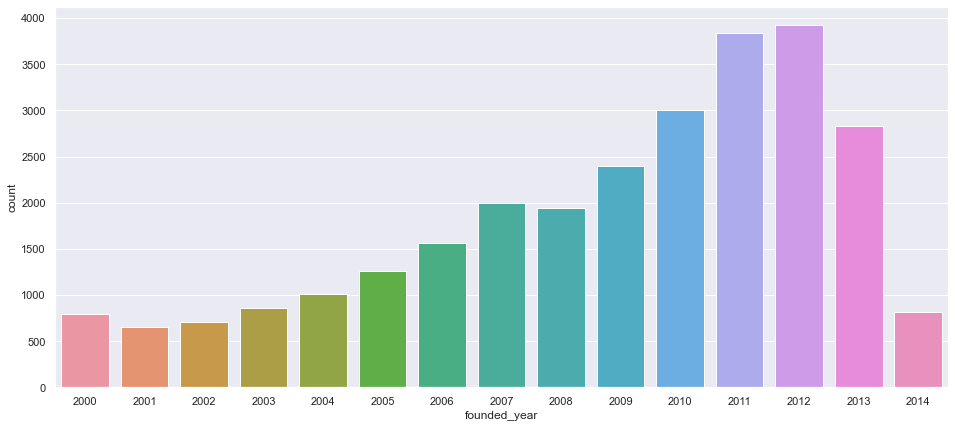

In [28]:
df_new = df[df['founded_year'] >= 2000]
df_new['founded_year'] = df_new['founded_year'].astype(int) # cleaning needed here?
plt.figure(figsize = (16,7))
sns.countplot(x = 'founded_year', data = df_new)
plt.show()

It’s clear there is a trend of entrepreneurship, with more startups being founded than previous years with the exception of 2013 & 2014. It may be worth looking at companies founded in 2013/14 and how they differ from previous years in this subsection. Another avenue to explore would be how these new companies compare to those pre 1960s, which seem to be more successful in terms of status e.g. operating v closed.

It could also be worth focusing on the funding provided to the companies based on their age. From here we can create one pivot table to understand the amount of funding being raised for companies being founded in specific years, and another looking at the total funding based on the company’s status.

#### 7 - Create Pivot Tables (Total Funding + Year Founded / Total Funding + Status)

In [29]:
# Pivot table - Total Funding + Year Founded
pt1 = pd.pivot_table(df, values=['funding_total_usd'], index=['founded_year'], aggfunc=np.mean)
pt1

,funding_total_usd
founded_year,
1902,2.083750e+07
1903,9.300000e+06
1905,6.000000e+05
1906,2.275600e+08
1907,1.100000e+07
...,...
2010,9.448381e+06
2011,6.526449e+06
2012,5.024777e+06


In [30]:
# Pivot table - Total Funding + Status
pt2 = pd.pivot_table(df, values=['funding_total_usd'], index=['status'], aggfunc=np.mean)
pt2

,funding_total_usd
status,
acquired,2.474738e+07
closed,8.234476e+06
operating,1.735183e+07


These pivot tables allow us to see a finer grain of detail and if there might be anything of further interest based on these numbers.

#### 8 - Count Unique Values in ‘Market’ Column

In [31]:
df['market'].value_counts().nlargest(10)

 Software                3219
 Biotechnology           2345
 Mobile                  1356
 E-Commerce              1127
 Curated Web             1022
 Enterprise Software      949
 Health Care              800
 Advertising              749
 Hardware + Software      743
 Games                    722
Name: market, dtype: int64

These are the 10 most popular industries that investors invest in. We can visualise this to get a better sense of the difference between market sizes.

#### 9 - Most Popular Markets for Investment

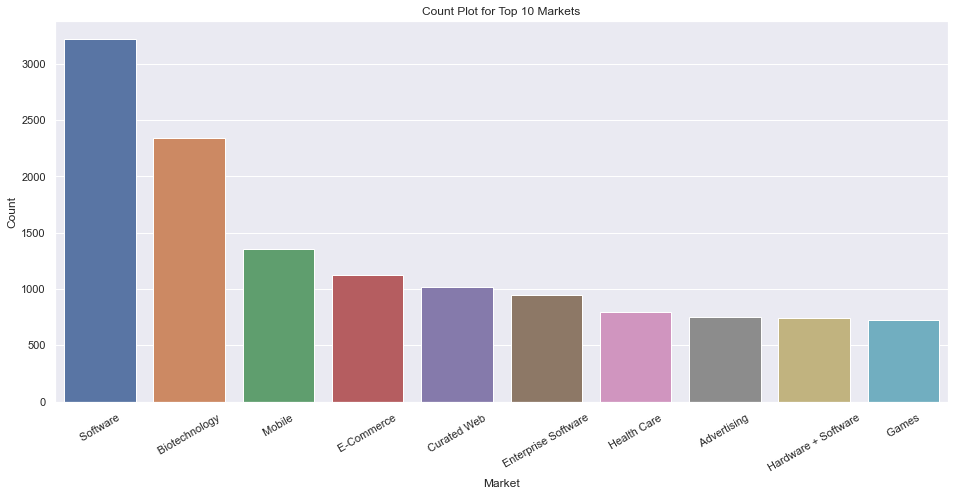

In [32]:
plt.figure(figsize=(16,7))
sns.countplot(x ='market', data = df, order=df['market'].value_counts().iloc[:10].index)
p = plt.title('Count Plot for Top 10 Markets') # Setting title
p = plt.xlabel('Market') # Setting x axis label
p = plt.ylabel('Count') # Setting y axis label
plt.xticks(rotation=30)
plt.show()

#### 10 - Most Popular Markets for Investment

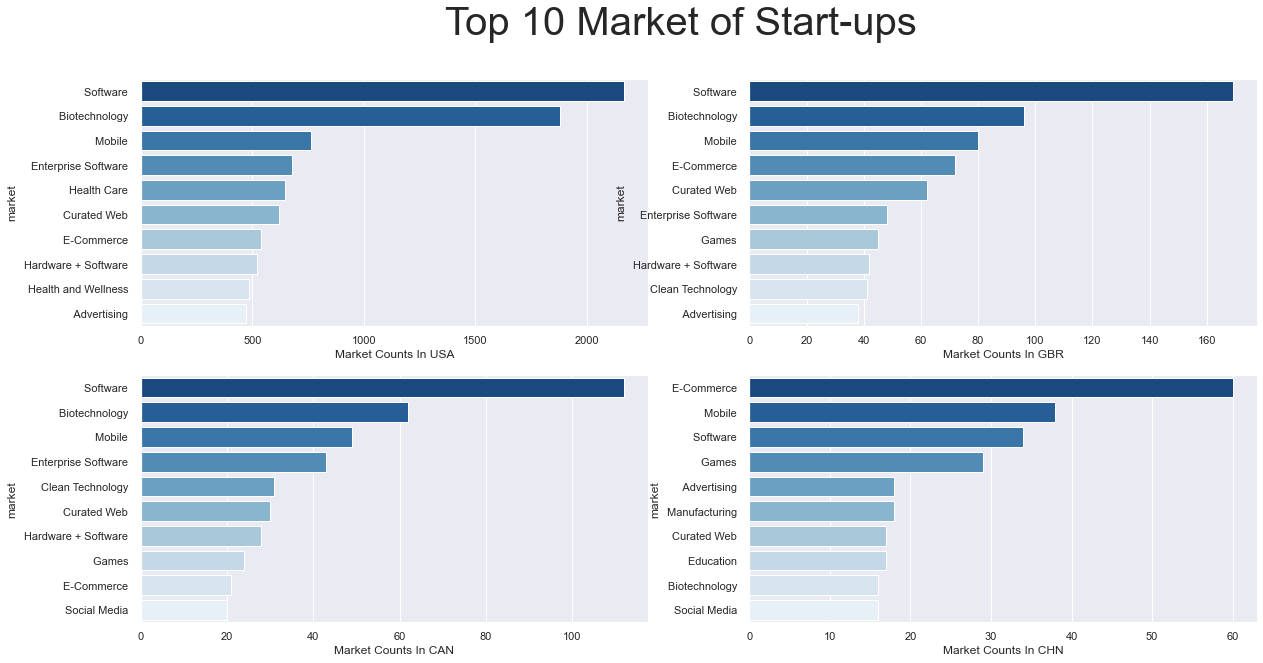

In [33]:
market_con=df.groupby('country_code')['market'].value_counts().to_frame()

fig,axes=plt.subplots(2,2,figsize=(20,10))
cont=['USA','GBR','CAN','CHN']
for con,ax in zip(cont,range(1,5)):
    ax=plt.subplot(2,2,ax)
    ax=sns.barplot(y=market_con.loc[con].index[0:10],x=market_con.loc[con].market[0:10],orient='h',palette='Blues_r')
    ax.set_xlabel('Market Counts In {}'.format(con))
plt.suptitle('Top 10 Market of Start-ups',size=40)
plt.show()

Now we can see how the top 10 most popular industries vary by country (USA, UK, Canada, China).

#### 11 - Count Unique Values in ‘City’ Column

In [34]:
df['city'].value_counts().nlargest(10)

San Francisco    1972
New York         1740
London            884
Austin            429
Palo Alto         425
Seattle           413
Cambridge         388
Mountain View     377
Chicago           358
Los Angeles       336
Name: city, dtype: int64

These are the startup hubs where companies tend to be invested in. We can visualise this to get a better sense of the difference between cities.

#### 12 - Visualise ‘City’ Column

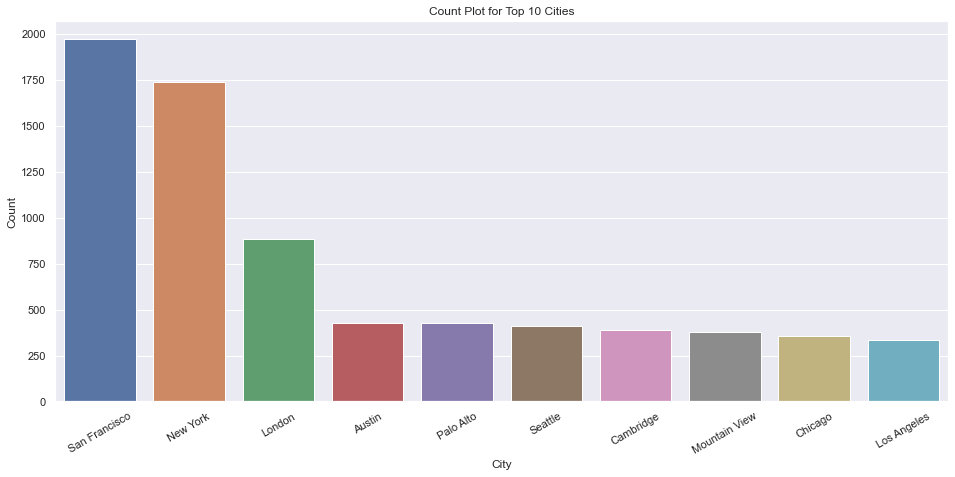

In [35]:
plt.figure(figsize=(16,7))
sns.countplot(x ='city', data = df, order=df['city'].value_counts().iloc[:10].index)
p = plt.title('Count Plot for Top 10 Cities') # Setting title
p = plt.xlabel('City') # Setting x axis label
p = plt.ylabel('Count') # Setting y axis label
plt.xticks(rotation=30)
plt.show()

#### 13 - Top 10% of Companies

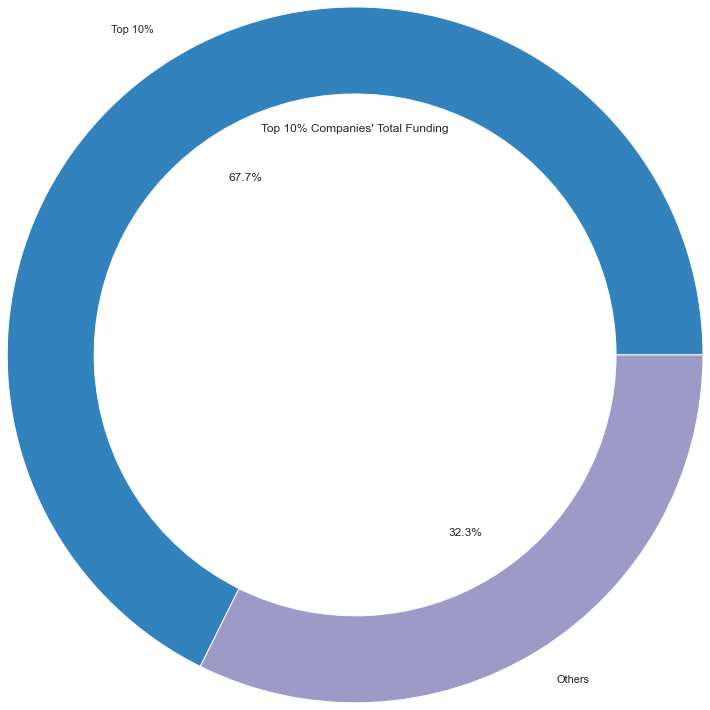

In [36]:
top_fund=(df.funding_total_usd.sort_values(ascending=False)[1:round((len(df['funding_total_usd'])/10))].sum())/(df.funding_total_usd.sort_values(ascending=False).sum())

plt.figure()
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(2)*13)
plt.pie([top_fund,1-top_fund], radius=2, colors=outer_colors,labels=['Top 10%','Others'],autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Top 10% Companies\' Total Funding',)
plt.show()

Here we can see that the top 10% of companies get almost 70% of the total investments made in startups.